# Comparing the transmon and the Quantum Harmonic Oscillator 

#### It is known to us from theory that the Quantum Harmonic Oscillator has evenly spaced energy levels while that is not so  in the case of a transmon.  Some amount of anharmonicity is required for the two-level approximation of the qubit to remain valid. The transmon qubit has a design similar to the cooper pair box (But in the latter case, the qubits encoded as charge states are particularly sensitive to charge noise).
#### In this code, I attempt to show the difference in energy levels of the QHO and the transmon by calculating them from their hamiltonian using QuTip which is basically the standard Quantum Toolbox in Python .

Date: 22-06-2021

In this code, we predominantly make use of the Transmon Hamiltonian
$$
\hat{H}_{\rm tr} = 4E_c \hat{n}^2 - E_J \cos \hat{\phi},
$$




In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [5]:
pip install qutip

     |████████████████████████████████| 16.0 MB 61 kB/s s eta 0:00:01         | 2.3 MB 11.0 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt
#E_J denotes the Josephson energy, w denotes Omega which is (8*EcEj)^1/2 - Ec where -Ec refers to the anharmoncity or Delta

E_J = 20e9
w = 5e9
Delta = -300e6

N_phis = 101
phis = np.linspace(-np.pi,np.pi,N_phis)
mid_idx = int((N_phis+1)/2)

# PE_QHO is denotes the potential energy of the Quantum Harmonic Oscillator 
#PE_transmon denotes the Potential Energy of the transmon
#We apply the standard formulae to obtain these values
PE_QHO = 0.5*E_J*phis**2
PE_QHO = PE_QHO/w
PE_transmon = (E_J-E_J*np.cos(phis))
PE_transmon = PE_transmon/w

In [15]:
#We now import Qutip
import qutip
from qutip import destroy

#Now constructing the Hamiltonian and then solving for the energies
N = 35
N_energies = 5
c = destroy(N)
H_QHO = w*c.dag()*c
E_QHO = H_QHO.eigenenergies()[0:N_energies]
H_transmon = w*c.dag()*c + (Delta/2)*(c.dag()*c)*(c.dag()*c - 1)
E_transmon = H_transmon.eigenenergies()[0:2*N_energies]

In [19]:
# We now print the energy levels
print(E_QHO)
print(E_transmon)

[0.0e+00 5.0e+09 1.0e+10 1.5e+10 2.0e+10]
[0.00e+00 1.70e+09 5.00e+09 6.60e+09 9.70e+09 1.12e+10 1.41e+10 1.55e+10
 1.82e+10 1.95e+10]


### As can be seen from the above generated energy level results, the values in the array E_QHO are evenly spaced, i.e they differ by 0.5e+10 units of energy , while in the case of the E_transmon, there seems to be an innate anharmonicity. 


### We can now plot the graph between energy levels and phase using the inbuilt plotting tools in Qubit and Matplotlib

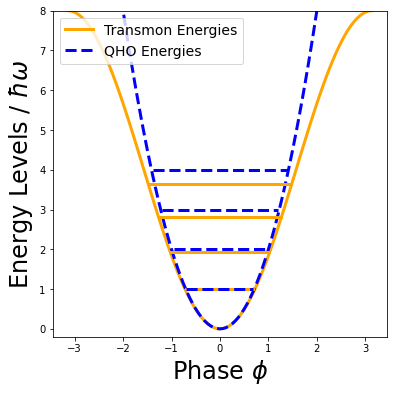

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(6,6))

axes.plot(phis, PE_transmon, '-', color='orange', linewidth=3.0)
axes.plot(phis, PE_QHO, '--', color='blue', linewidth=3.0)

for eidx in range(1,N_energies):
    delta_E_QHO = (E_QHO[eidx]-E_QHO[0])/w
    delta_E_transmon = (E_transmon[2*eidx]-E_transmon[0])/w
    QHO_lim_idx = min(np.where(PE_QHO[int((N_phis+1)/2):N_phis] > delta_E_QHO)[0])
    trans_lim_idx = min(np.where(PE_transmon[int((N_phis+1)/2):N_phis] > delta_E_transmon)[0])
    trans_label, = axes.plot([phis[mid_idx-trans_lim_idx-1], phis[mid_idx+trans_lim_idx-1]], \
                             [delta_E_transmon, delta_E_transmon], '-', color='orange', linewidth=3.0)
    qho_label, = axes.plot([phis[mid_idx-QHO_lim_idx-1], phis[mid_idx+QHO_lim_idx-1]], \
                           [delta_E_QHO, delta_E_QHO], '--', color='blue', linewidth=3.0)
    
axes.set_xlabel('Phase $\phi$', fontsize=24)
axes.set_ylabel('Energy Levels / $\hbar\omega$', fontsize=24)
axes.set_ylim(-0.2,8)

qho_label.set_label('QHO Energies')
trans_label.set_label('Transmon Energies')
axes.legend(loc=2, fontsize=14)